In [15]:
import pandas as pd
from scipy.io import arff

import plotly
plotly.tools.set_credentials_file(username='artemii-yanushevskyi', api_key='aRmQfG7U4SAlhISYVym7')

import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import Image
import plotly.io as pio

import numpy as np
import seaborn as sns

from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu

exporting = True

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold

import importlib
import assistmodule
importlib.reload(assistmodule)
from assistmodule import thresholding, boxplot_scores, cs_classification, classification


data, meta = arff.loadarff('cworkTrain.arff')
df = pd.DataFrame(data)

# all categorical attributes are in binary format

df = assistmodule.decode_dataframe(df)

display(
    'The dataset contains {} entries and {} attributes.'.format(*df.shape),
    df.head(),
    'There are 9 categorical and 8 numerical attributes.',
    'The statistics for categorical attributes:',
    df.select_dtypes([object]).describe(), 
    'The statistics for numerical attributes:',
    df.select_dtypes([float, int]).describe().round(1)
)

df['month'] = pd.to_datetime(df.month, format='%b').dt.month
df['termDeposit'] = df['termDeposit'].apply(lambda x: 0 if x == 'no' else 1)
# this finalises the initial preparation step
df_base = df.copy(deep=True)
df_original = df.copy(deep=True)
df = assistmodule.one_hot_encode_categorical(df)
df.head()

'The dataset contains 36169 entries and 17 attributes.'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termDeposit
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139.0,1.0,-1.0,0.0,unknown,no


'There are 9 categorical and 8 numerical attributes.'

'The statistics for categorical attributes:'

,job,marital,education,default,housing,loan,contact,month,poutcome,termDeposit
count,36169,36169,36169,36169,36169,36169,36169,36169,36169,36169
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7808,21746,18594,35512,20049,30363,23416,11013,29621,31981


'The statistics for numerical attributes:'

,age,balance,day,duration,campaign,pdays,previous
count,36169.0,36169.0,36169.0,36169.0,36169.0,36169.0,36169.0
mean,40.9,1352.8,15.8,256.7,2.8,39.9,0.6
std,10.6,3028.9,8.3,255.6,3.1,99.8,2.4
min,18.0,-6847.0,1.0,0.0,1.0,-1.0,0.0
25%,33.0,70.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,445.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1417.0,21.0,317.0,3.0,-1.0,0.0
max,95.0,98417.0,31.0,4918.0,63.0,871.0,275.0


1 job
2 marital
3 education
4 default
6 housing
7 loan
8 contact
15 poutcome


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,termDeposit
0,58.0,0,0,0,0,1,0,0,0,0,...,5,261.0,1.0,-1.0,0.0,0,0,0,1,0
1,44.0,0,0,0,0,0,0,0,0,0,...,5,151.0,1.0,-1.0,0.0,0,0,0,1,0
2,33.0,0,0,1,0,0,0,0,0,0,...,5,76.0,1.0,-1.0,0.0,0,0,0,1,0
3,47.0,0,1,0,0,0,0,0,0,0,...,5,92.0,1.0,-1.0,0.0,0,0,0,1,0
4,35.0,0,0,0,0,1,0,0,0,0,...,5,139.0,1.0,-1.0,0.0,0,0,0,1,0


## Baseline Classification

finished Tree 0.0001
finished 15-NN
finished Logistic R
finished RandomF 50 trees


,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,0.901711,0.898421,0.900135,0.902209
std,0.003283,0.002536,0.003554,0.002802
min,0.897124,0.893835,0.894082,0.898535
25%,0.898721,0.897007,0.897982,0.900118
50%,0.902129,0.898949,0.900055,0.901866
75%,0.904824,0.900726,0.903103,0.905012
max,0.905196,0.901050,0.905170,0.905447


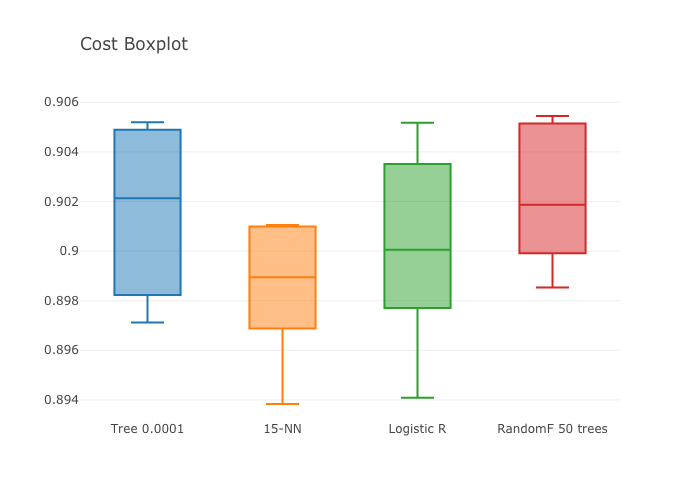

None

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Fold 1/10 for Tree 0.0001 with lowest cost 1153.00 at t = 0.11
Fold 2/10 for Tree 0.0001 with lowest cost 1204.00 at t = 0.13
Fold 3/10 for Tree 0.0001 with lowest cost 1229.00 at t = 0.06
Fold 4/10 for Tree 0.0001 with lowest cost 1144.00 at t = 0.07
Fold 5/10 for Tree 0.0001 with lowest cost 1136.00 at t = 0.08
Fold 6/10 for Tree 0.0001 with lowest cost 1303.00 at t = 0.06
Fold 7/10 for Tree 0.0001 with lowest cost 1254.00 at t = 0.06
Fold 8/10 for Tree 0.0001 with lowest cost 1220.00 at t = 0.11
Fold 9/10 for Tree 0.0001 with lowest cost 1144.00 at t = 0.09
Fold 10/10 for Tree 0.0001 with lowest cost 1110.00 at t = 0.06
The lowest cos

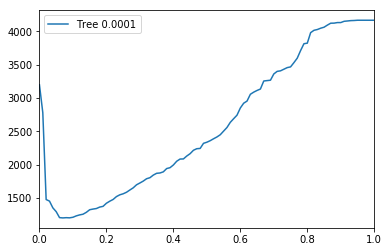




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform') 

Fold 1/10 for 15-NN with lowest cost 1270.00 at t = 0.07
Fold 2/10 for 15-NN with lowest cost 1319.00 at t = 0.14
Fold 3/10 for 15-NN with lowest cost 1378.00 at t = 0.07
Fold 4/10 for 15-NN with lowest cost 1341.00 at t = 0.07
Fold 5/10 for 15-NN with lowest cost 1232.00 at t = 0.07
Fold 6/10 for 15-NN with lowest cost 1510.00 at t = 0.01
Fold 7/10 for 15-NN with lowest cost 1338.00 at t = 0.07
Fold 8/10 for 15-NN with lowest cost 1294.00 at t = 0.07
Fold 9/10 for 15-NN with lowest cost 1277.00 at t = 0.07
Fold 10/10 for 15-NN with lowest cost 1336.00 at t = 0.07
The lowest cost will be reached if t is equal to       0.07
The lowest average cost would be                           1330.1.


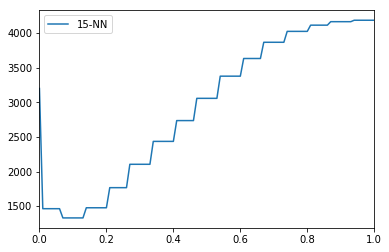




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False) 

Fold 1/10 for Logistic R with lowest cost 1286.00 at t = 0.10
Fold 2/10 for Logistic R with lowest cost 1332.00 at t = 0.11
Fold 3/10 for Logistic R with lowest cost 1357.00 at t = 0.09
Fold 4/10 for Logistic R with lowest cost 1418.00 at t = 0.10
Fold 5/10 for Logistic R with lowest cost 1231.00 at t = 0.11
Fold 6/10 for Logistic R with lowest cost 1439.00 at t = 0.09
Fold 7/10 for Logistic R with lowest cost 1313.00 at t = 0.09
Fold 8/10 for Logistic R with lowest cost 1275.00 at t = 0.09
Fold 9/10 for Logistic R with lowest cost 1294.00 at t = 0.10
Fold 10/10 for Logistic R with lowest cost 1259.00 at t = 0.10
The lowest cost will be reached if t is equal to       0.10
The lowest average cost would be                    

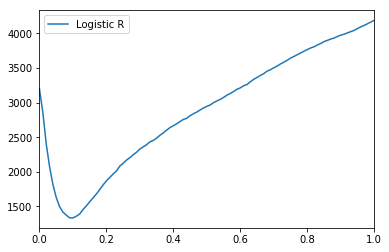




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Fold 1/10 for RandomF 50 trees with lowest cost 982.00 at t = 0.13
Fold 2/10 for RandomF 50 trees with lowest cost 1019.00 at t = 0.11
Fold 3/10 for RandomF 50 trees with lowest cost 1051.00 at t = 0.09
Fold 4/10 for RandomF 50 trees with lowest cost 1029.00 at t = 0.09
Fold 5/10 for RandomF 50 trees with lowest cost 997.00 at t = 0.13
Fold 6/10 for RandomF 50 trees with lowest cost 1017.00 at t = 0.07
Fold 7/10 for RandomF 50 trees with lowest cost 1052.00 at t = 0.11
Fold 8/10 for RandomF 50 trees with lowest cost 1015.00 at t = 0.11
Fold 9/10 for RandomF 50 trees 

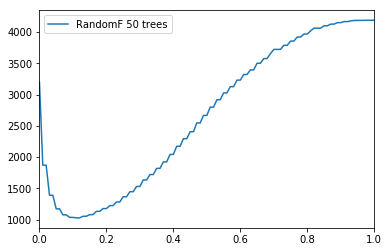

,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,1202.400000,1330.100000,1335.000000,1028.200000
std,65.956551,77.573549,71.678294,26.823704
min,1113.000000,1232.000000,1259.000000,992.000000
25%,1144.250000,1281.250000,1288.000000,1011.250000
50%,1199.500000,1328.000000,1322.000000,1017.500000
75%,1253.250000,1340.250000,1359.500000,1048.000000
max,1309.000000,1515.000000,1485.000000,1071.000000


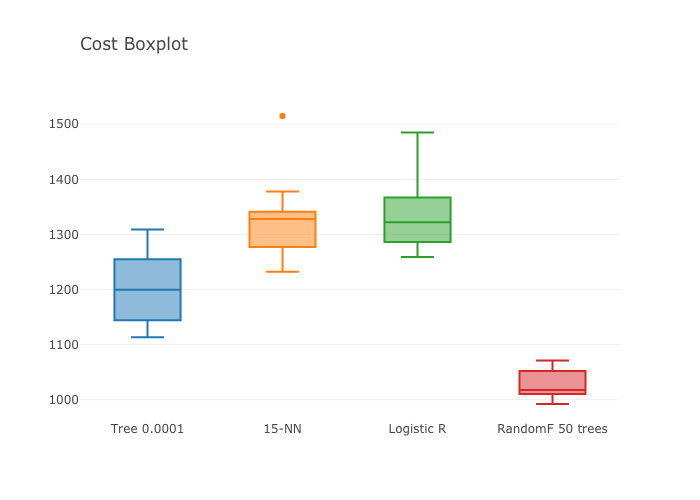

None

In [16]:
df_numerical = df.select_dtypes([int, float]).drop('termDeposit', axis=1)
# apply standartisation
df_st_numerical = pd.DataFrame(StandardScaler().fit_transform(df_numerical.values), index=df_numerical.index, columns=df_numerical.columns)
df.update(df_st_numerical)

permutation = np.random.RandomState(seed=42).permutation(len(df))
df_test = df.iloc[permutation]

X = df_test.drop('termDeposit', axis=1).values
y = df_test['termDeposit'].values

display(boxplot_scores(classification(X, y)))
display(boxplot_scores(cs_classification(X, y)))

# Feature Engineering

One of FE steps that I have already done is _Standardisation_, it benefited to the great extend to all the selected classifiers, except _Decision Tree_ and _Random Forest_ classifiers.

Having done preliminary inspection of the features, we will be process the features to make them more suitable for the classification algorithms.

In [2]:
df_backup = df.copy(deep=True)

In [6]:
def display_cols(x):
    pd.set_option('display.max_columns', len(x.columns))
    display(x)
    pd.reset_option('display.max_columns')

## Job attribute

There are many different attribute values. It will negatively affect our prediction. We will group them by the percentage of '_yeses_'.

Sorting attributes by the success rate

In [7]:
# sort jobs by success rate
group_job = df_original.groupby(['job'])[['termDeposit']].mean().sort_values(['termDeposit'])
display(group_job)
# group into categories
groups = []
y = -np.inf
for x in [0.08, 0.1, 0.12, 0.15, 0.2, 0.25, 0.29]:
    group = group_job.index[(y < group_job.termDeposit) & (group_job.termDeposit < x)]
    groups.append(list(group))
    y = x

print('So the groups are', groups)
# create a column name for each group
colnames = []
for group in groups:
    colname = '-'.join([c[:4] for c in group])
    colnames.append(colname)
    
print(colnames)
df_jobs = df_original[['job']].copy(deep=True)
# create a column for each group
for i in range(len(groups)):
    newcol = [1 if job in groups[i] else 0 for job in df_jobs['job']]
    df_jobs['jobnew_' + colnames[i]] = newcol

# delete job
df_jobs = df_jobs.drop('job', axis=1)
df_jobs.head()

,termDeposit
job,
blue-collar,0.072490
entrepreneur,0.084307
housemaid,0.087702
services,0.088007
unknown,0.103139
technician,0.108542
self-employed,0.115806
admin.,0.119162
management,0.136867


So the groups are [['blue-collar'], ['entrepreneur', 'housemaid', 'services'], ['unknown', 'technician', 'self-employed', 'admin.'], ['management'], ['unemployed'], ['retired'], ['student']]
['blue', 'entr-hous-serv', 'unkn-tech-self-admi', 'mana', 'unem', 'reti', 'stud']


,jobnew_blue,jobnew_entr-hous-serv,jobnew_unkn-tech-self-admi,jobnew_mana,jobnew_unem,jobnew_reti,jobnew_stud
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0


The union of the jobs in such groups is not arbitrary, I chose to group jobs that have very close success rate. Thus the future models would be trained on lager groups, it will boost accuracy for the jobs in minority.

In [8]:
df = df.drop([col for col in df.columns if col.startswith('job_')], axis=1)
for col in df_jobs.columns:
    df.insert(1, col, df_jobs[[col]].values)

We have created new columns in our data

In [9]:
display_cols(df.head())

,age,jobnew_stud,jobnew_reti,jobnew_unem,jobnew_mana,jobnew_unkn-tech-self-admi,jobnew_entr-hous-serv,jobnew_blue,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,balance,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,day,month,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,termDeposit
0,1.616177,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0.260875,0,1,1,0,0,0,1,-1.298455,-0.475359,0.016659,-0.574882,-0.409877,-0.241954,0,0,0,1,0
1,0.296210,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,-0.437072,0,1,1,0,0,0,1,-1.298455,-0.475359,-0.413717,-0.574882,-0.409877,-0.241954,0,0,0,1,0
2,-0.740908,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,-0.445986,0,1,0,1,0,0,1,-1.298455,-0.475359,-0.707156,-0.574882,-0.409877,-0.241954,0,0,0,1,0
3,0.579060,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0.050567,0,1,1,0,0,0,1,-1.298455,-0.475359,-0.644556,-0.574882,-0.409877,-0.241954,0,0,0,1,0
4,-0.552341,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,-0.370380,0,1,1,0,0,0,1,-1.298455,-0.475359,-0.460668,-0.574882,-0.409877,-0.241954,0,0,0,1,0


### Tests

finished Tree 0.0001
finished 15-NN
finished Logistic R
finished RandomF 50 trees


,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,0.901407,0.898449,0.900301,0.902707
std,0.003372,0.002187,0.003335,0.002724
min,0.896876,0.895217,0.895188,0.897982
25%,0.898099,0.896738,0.898051,0.900891
50%,0.901714,0.898521,0.900470,0.903096
75%,0.904686,0.899848,0.902356,0.904936
max,0.905196,0.902156,0.905723,0.906276


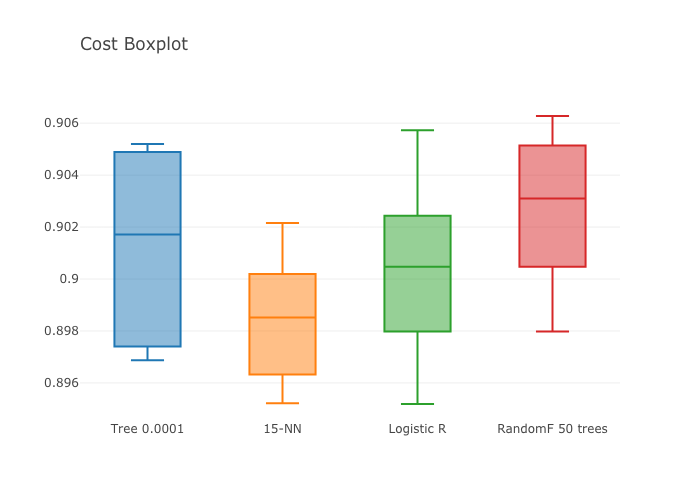

None

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Fold 1/10 for Tree 0.0001 with lowest cost 1153.00 at t = 0.11
Fold 2/10 for Tree 0.0001 with lowest cost 1204.00 at t = 0.13
Fold 3/10 for Tree 0.0001 with lowest cost 1181.00 at t = 0.06
Fold 4/10 for Tree 0.0001 with lowest cost 1153.00 at t = 0.07
Fold 5/10 for Tree 0.0001 with lowest cost 1136.00 at t = 0.08
Fold 6/10 for Tree 0.0001 with lowest cost 1293.00 at t = 0.06
Fold 7/10 for Tree 0.0001 with lowest cost 1254.00 at t = 0.06
Fold 8/10 for Tree 0.0001 with lowest cost 1210.00 at t = 0.11
Fold 9/10 for Tree 0.0001 with lowest cost 1144.00 at t = 0.09
Fold 10/10 for Tree 0.0001 with lowest cost 1110.00 at t = 0.06
The lowest cos

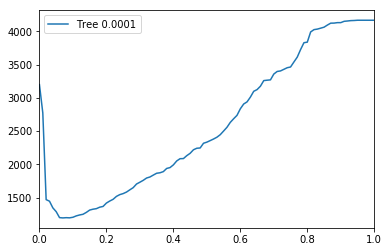




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform') 

Fold 1/10 for 15-NN with lowest cost 1264.00 at t = 0.07
Fold 2/10 for 15-NN with lowest cost 1311.00 at t = 0.07
Fold 3/10 for 15-NN with lowest cost 1410.00 at t = 0.07
Fold 4/10 for 15-NN with lowest cost 1413.00 at t = 0.07
Fold 5/10 for 15-NN with lowest cost 1206.00 at t = 0.07
Fold 6/10 for 15-NN with lowest cost 1449.00 at t = 0.07
Fold 7/10 for 15-NN with lowest cost 1374.00 at t = 0.07
Fold 8/10 for 15-NN with lowest cost 1301.00 at t = 0.07
Fold 9/10 for 15-NN with lowest cost 1323.00 at t = 0.07
Fold 10/10 for 15-NN with lowest cost 1359.00 at t = 0.07
The lowest cost will be reached if t is equal to       0.07
The lowest average cost would be                           1341.0.


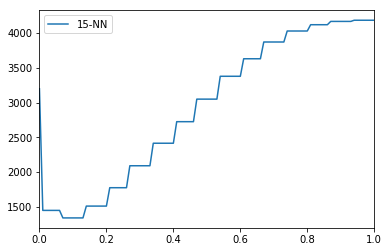




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False) 

Fold 1/10 for Logistic R with lowest cost 1285.00 at t = 0.09
Fold 2/10 for Logistic R with lowest cost 1298.00 at t = 0.09
Fold 3/10 for Logistic R with lowest cost 1350.00 at t = 0.09
Fold 4/10 for Logistic R with lowest cost 1410.00 at t = 0.10
Fold 5/10 for Logistic R with lowest cost 1259.00 at t = 0.10
Fold 6/10 for Logistic R with lowest cost 1422.00 at t = 0.08
Fold 7/10 for Logistic R with lowest cost 1321.00 at t = 0.10
Fold 8/10 for Logistic R with lowest cost 1275.00 at t = 0.09
Fold 9/10 for Logistic R with lowest cost 1293.00 at t = 0.09
Fold 10/10 for Logistic R with lowest cost 1244.00 at t = 0.10
The lowest cost will be reached if t is equal to       0.09
The lowest average cost would be                    

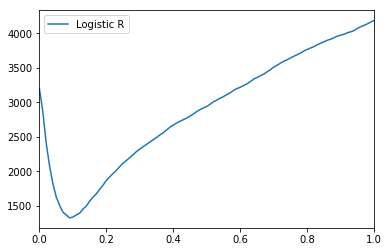




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Fold 1/10 for RandomF 50 trees with lowest cost 990.00 at t = 0.11
Fold 2/10 for RandomF 50 trees with lowest cost 1054.00 at t = 0.11
Fold 3/10 for RandomF 50 trees with lowest cost 1035.00 at t = 0.09
Fold 4/10 for RandomF 50 trees with lowest cost 1035.00 at t = 0.09
Fold 5/10 for RandomF 50 trees with lowest cost 1092.00 at t = 0.11
Fold 6/10 for RandomF 50 trees with lowest cost 1059.00 at t = 0.09
Fold 7/10 for RandomF 50 trees with lowest cost 1095.00 at t = 0.11
Fold 8/10 for RandomF 50 trees with lowest cost 1130.00 at t = 0.11
Fold 9/10 for RandomF 50 trees

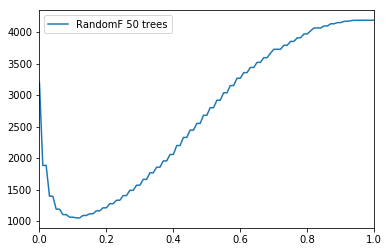

,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,1196.500000,1341.000000,1328.500000,1050.500000
std,59.855845,74.535599,62.803485,53.860416
min,1113.000000,1206.000000,1275.000000,962.000000
25%,1147.000000,1303.500000,1287.000000,1005.250000
50%,1199.000000,1341.000000,1297.000000,1059.500000
75%,1230.500000,1401.000000,1344.000000,1089.500000
max,1299.000000,1449.000000,1441.000000,1130.000000


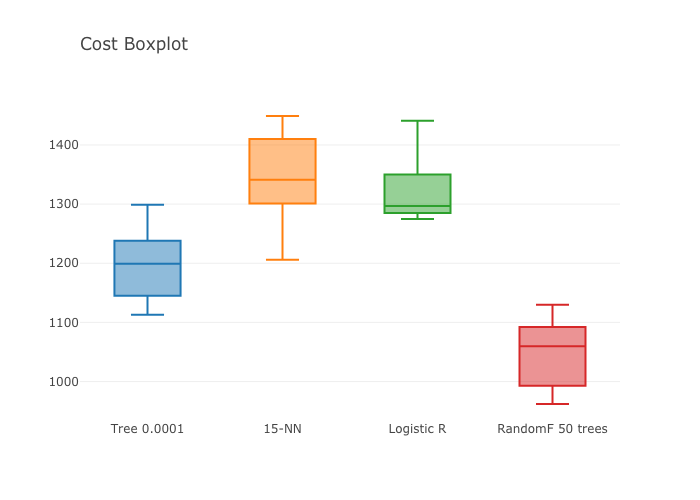

None

In [10]:
permutation = np.random.RandomState(seed=42).permutation(len(df))
df_test = df.iloc[permutation]

X = df_test.drop('termDeposit', axis=1).values
y = df_test['termDeposit'].values

display(boxplot_scores(classification(X, y)))
display(boxplot_scores(cs_classification(X, y)))

It appears that nothing had changed. This method had decreased slightly the performance of our classifiers. I would consider this increase insignificant, because it may be just accidental (since the mean difference is less than two $std$). This approach should not be used. Such grouping may be beneficial to decrease classification time (which is extensive for _Logistic Regression_) and make more accurate predictions for minority groups. This method is not suitable.

In [17]:
# return to the original
df = df_backup.copy(deep=True)
df_numerical = df_original.select_dtypes([int, float]).drop('termDeposit', axis=1)
df.update(df_numerical)

## Age

Notice that after 62 yo we see that subscription rate is constant being about 50%. Also, as we can see from histogram, the number of entries with age above 60 drops significantly.

So, for age that is above 66, we will set it to be equal to 67. Now the distribution of age reminds Gaussian distribution even more.

In [18]:
df.loc[df['age'] > 66, 'age'] = 67

Obviously, this wouldn't benefit _Decision Tree_ nor _Random Forest_ classifiers, because at some point classifier will make a division, provided it has significant _Information Gain_.

## Day and Month

In [19]:
df['date'] = pd.Series(df_original['month'].astype(str).values + '.' +  df_original['day'].astype(int).astype(str).values)
df['date'] = pd.to_datetime(df['date'], format='%m.%d')

I created the new attribute `date`. It is defined as date via `day` and `month` attributes. Pay attention at the success rate by date.

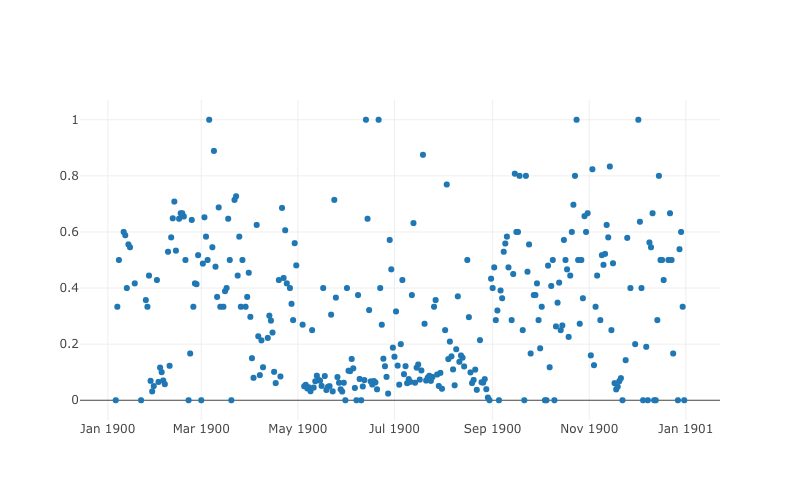

In [20]:
groupdate = df.groupby('date')[['termDeposit']].mean()
trace = go.Scatter(
    x = groupdate.index,
    y = groupdate['termDeposit'],
    mode = 'markers'
)

layout = go.Layout(
    autosize=False,
    width=800,
    height=500)

data = [trace]
fig = go.Figure(data=data, layout=layout)
if exporting == True:
    static_image_bytes = pio.to_image(fig, format='png')
    display(Image(static_image_bytes))
else:
    display(iplot(fig))

While exploring `month` attribute, I noticed that the success percentage is inversely proportional to the percentage of entries for this month

,mean,count
month,,
1,0.098039,0.031021
2,0.161397,0.058586
3,0.515707,0.010562
4,0.198636,0.064862
5,0.066194,0.304487
6,0.098994,0.118140
7,0.091371,0.152506
8,0.108243,0.138185
9,0.467532,0.012773


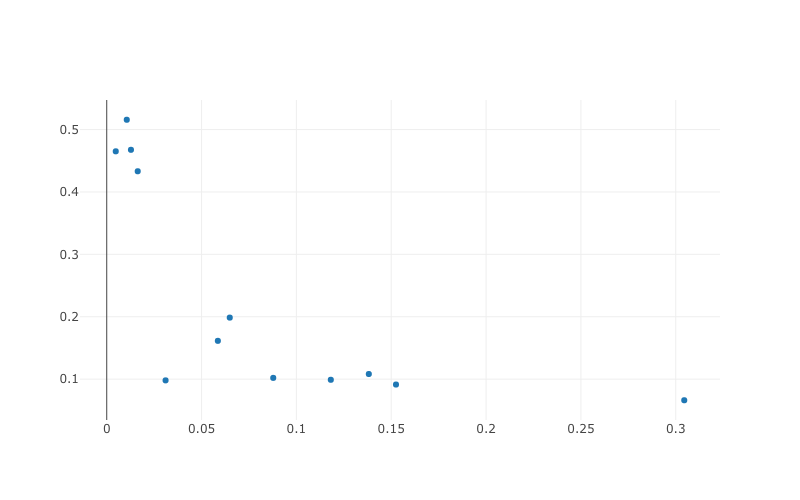

In [21]:
groupby = pd.concat([
    df_original.groupby('month')[['termDeposit']].mean(),
    df_original.groupby('month')[['termDeposit']].count()/len(df)
], axis=1)

groupby.columns = ['mean', 'count']
display(groupby)

trace = go.Scatter(
    x = groupby['count'],
    y = groupby['mean'],
    mode = 'markers'
)

layout = go.Layout(
    autosize=False,
    width=800,
    height=500)

fig = go.Figure(data=[trace], layout=layout)
if exporting == True:
    static_image_bytes = pio.to_image(fig, format='png')
    display(Image(static_image_bytes))
else:
    display(iplot(fig))

It turns out that the same holds true even for the days. The more calls are done during the day, the lesser success rate becomes. It may be because the callers are focusing on the number of calls rather than persuading the audience to make term deposit.

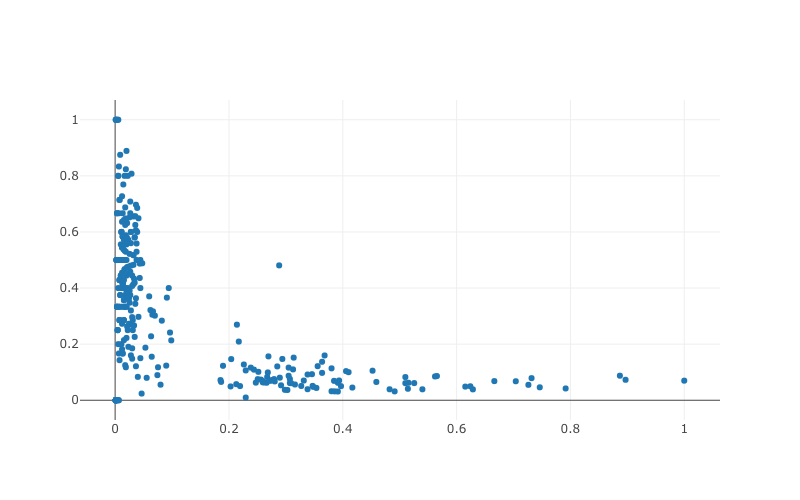

In [22]:
groupby = pd.concat([
    df.groupby('date')[['termDeposit']].mean(),
    df.groupby('date')[['termDeposit']].count()/max(df.groupby('date')[['termDeposit']].count().values)
], axis=1)
groupby.columns = ['mean', 'count']

trace = go.Scatter(
    x = groupby['count'],
    y = groupby['mean'],
    mode = 'markers'
)

layout = go.Layout(
    autosize=False,
    width=800,
    height=500)

data = [trace]
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
if exporting == True:
    static_image_bytes = pio.to_image(fig, format='png')
    display(Image(static_image_bytes))
else:
    display(iplot(fig))

This suggests that we may want to replace the attributes `day`, `month`, and `date` by the number of calls on that day.

It would be really nice if we have had the year. This way we can see how success rate depends on the day of the week. This will require processing the train and test set (the entire dataset) at the same time, which is beyond the scope of this coursework (the issue is that it is not certain what metrics should be used for evaluations).

We don't need to preserve `day`, and `date` attributes. The attribute `month` is usefull only with regards to the fact that the calling team gradually improves with time.

In [23]:
df = df.drop(['day', 'date'], axis=1)

## Balance
This attribute is the most confusing. From the histogram we can infer that it is quite unlikely that for 10 present the balance attribute is between -8 and 8 pounds. It is either because their actual balance is different since they may use other means to save money. As a result the balance is not a good predictor for target attribute.

### Replacing
I will try to make balance to be more stronger estimation of the wealth by replacing the value between -8 and 8 by its estimation from more stronger predictors, such as: `education`, `marital`, `default`, `housing`, `loan`, `contact`, and `poutcome`.

The good predictors for balance attribute are

In [24]:
good_predictors_ind = [*range(1, 17), *range(18, 25), *range(31,35)]
good_predictors = []
for i in good_predictors_ind:
    good_predictors.append(df.columns[i])

good_predictors

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'balance',
 'housing_no',
 'housing_yes',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [25]:
df_good_predictors = df[good_predictors]

mask = (-8 < df['balance']) & (df['balance'] < 8) # 'to be predicted' mask

reg = LinearRegression(normalize=True)
reg.fit(df_good_predictors.loc[~mask], df['balance'].loc[~mask])
df.loc[mask, 'balance'] = reg.predict(df_good_predictors.loc[mask])
df[['balance']].head()

,balance
0,2143.0
1,29.0
2,2.0
3,1506.0
4,231.0


### Logarithm
The second reason why this will be beneficial is because the distribution is lognormal, like all human generated data usually is. I will apply function $\log$ to the attribute values to oblatin a distribution close to Gaussian.

Now we can freely apply logarithm to the attribute balance.

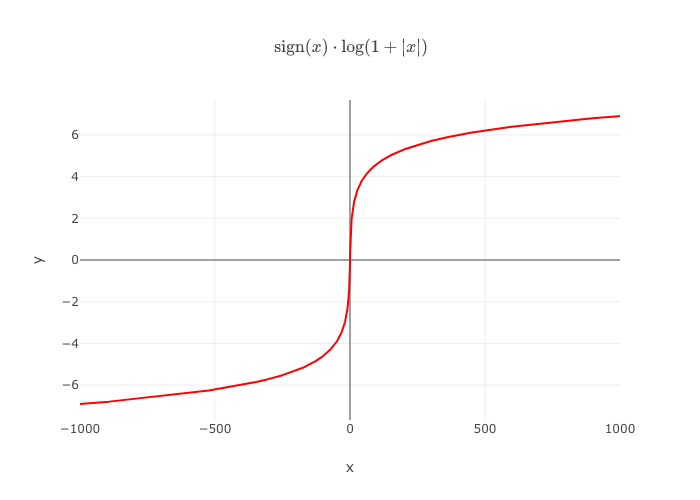

In [26]:
x = np.linspace(-1000, 1000, num=3000)
y = np.sign(x) * np.log(1 + np.abs(x))
              
trace = go.Scatter(x=x, y=y, marker={'color': 'red'}, 
                    mode="lines")
                                               
data = [trace]
layout = go.Layout(title="Graph of $\DeclareMathOperator{\sign}{sign} \sign(x)\cdot\log(1+|x|)$", xaxis={'title':'x'}, yaxis={'title':'y'})
fig = go.Figure(data=data,layout=layout)
if exporting == True:
    static_image_bytes = pio.to_image(fig, format='png')
    display(Image(static_image_bytes))
else:
    display(iplot(fig))

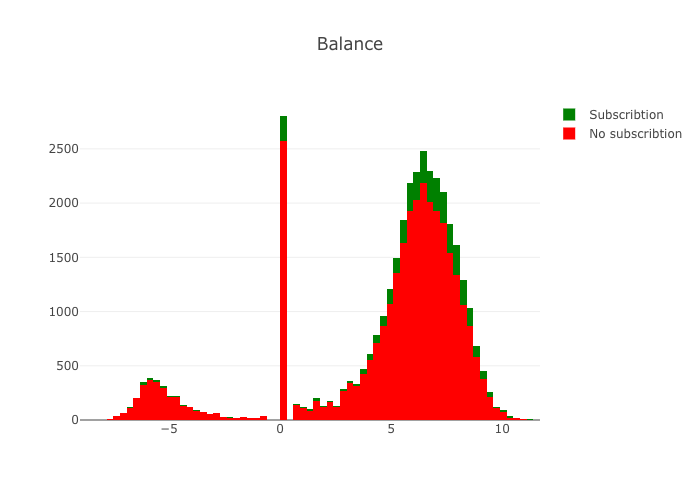

In [27]:
x = df['balance']
df['balance'] = np.sign(x) * np.log(1 + np.abs(x))
assistmodule.plotattributes(df, ['balance'], size=0.3)

Now we may standardise `balance` attribute. We are standardising attribute values because we would like to see how much one variable impacts the outcome in comparison to other variables.

In [28]:
df['balance'] = (df['balance'] - df['balance'].mean())/df['balance'].std()

## Duration

The same approach as with `balance`, apply $log$:

$$ \texttt{duration} := \sign(\texttt{duration})\log(1+|\texttt{duration}|)$$

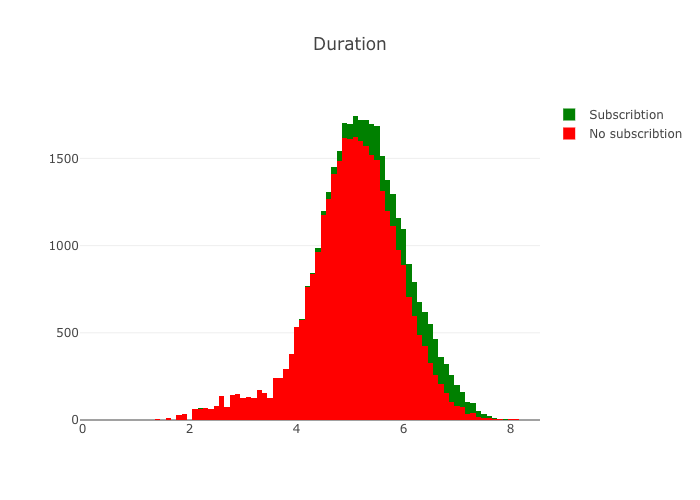

In [29]:
x = df['duration']
df['duration'] = np.sign(x) * np.log(1 + np.abs(x))
assistmodule.plotattributes(df, ['duration'], size=0.1)

In [30]:
df['duration'] = (df['duration'] - df['duration'].mean())/df['duration'].std()

## Campaign

Apply $\log(6+x)$.

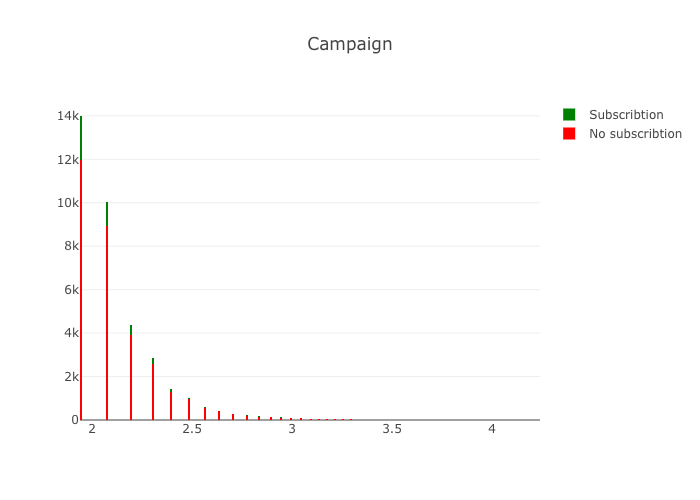

In [31]:
x = df_original['campaign']
df['campaign'] = np.log(6 + x)
assistmodule.plotattributes(df, ['campaign'], size=0.01)

In [32]:
df_original.groupby('campaign')[['termDeposit']].mean().head(9)

,termDeposit
campaign,
1.0,0.144848
2.0,0.110302
3.0,0.109361
4.0,0.092704
5.0,0.075672
6.0,0.074976
7.0,0.059022
8.0,0.069284
9.0,0.065934


The `campaign` attribute requires no preprocessing, because it is already quite represents the success rate quite well. The success rate decreases as the campaign number increases, $\frac{1}{x}$-dependency.

## Pdays

It is not quite clear what strategy to use with `pdays` attribute.

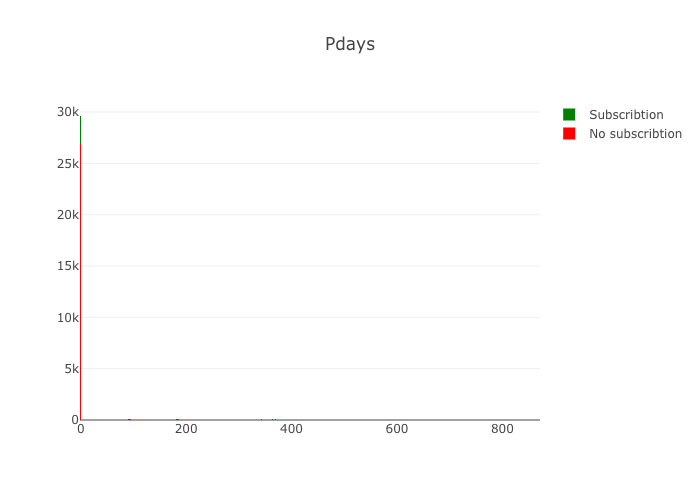

In [33]:
assistmodule.plotattributes(df, ['pdays'], size=1)

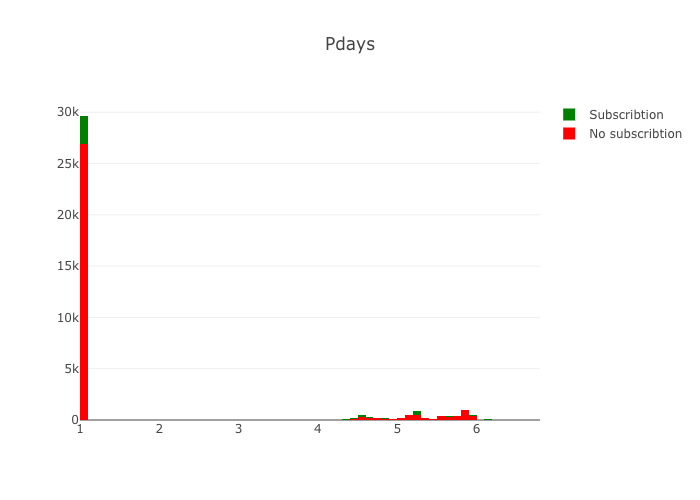

In [34]:
x = df['pdays']
df['pdays'] = np.sign(2 + x) * np.log(2 + np.abs(x))
assistmodule.plotattributes(df, ['pdays'], size=0.1)

$$ \texttt{pdays} := \sign(2 + \texttt{pdays})\log(2 +|\texttt{pdays}|)$$

On each stage of the analysis, we can notice that `pdays` attribute does not really impact the target attribute. 
However, when applied $\log$ transformation, now it could be noticed that if `pdays` attribute is not equal to .. then the chance that deposit will be made increases significantly.

# Test

finished Tree 0.0001
finished 15-NN
finished Logistic R
finished RandomF 50 trees


,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,0.901296,0.896652,0.899804,0.901407
std,0.002971,0.002766,0.001981,0.003576
min,0.897705,0.891653,0.897429,0.894111
25%,0.898942,0.895286,0.898334,0.900671
50%,0.900318,0.896447,0.899489,0.902281
75%,0.903719,0.897152,0.900401,0.902405
max,0.906578,0.901852,0.904064,0.907658


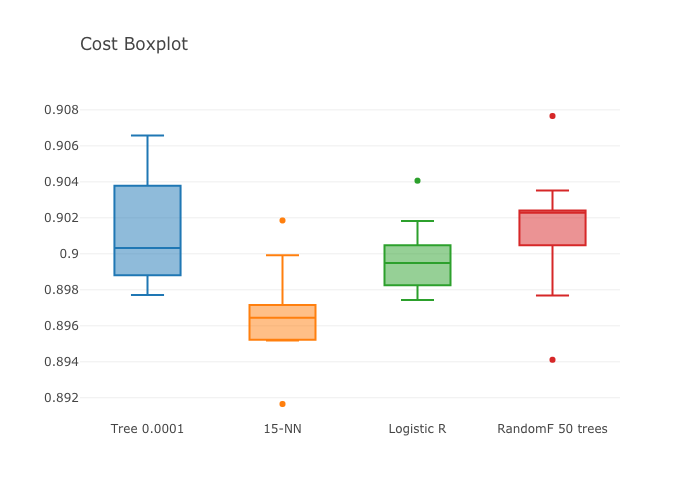

None

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Fold 1/10 for Tree 0.0001 with lowest cost 1225.00 at t = 0.10
Fold 2/10 for Tree 0.0001 with lowest cost 1239.00 at t = 0.07
Fold 3/10 for Tree 0.0001 with lowest cost 1281.00 at t = 0.06
Fold 4/10 for Tree 0.0001 with lowest cost 1188.00 at t = 0.07
Fold 5/10 for Tree 0.0001 with lowest cost 1202.00 at t = 0.05
Fold 6/10 for Tree 0.0001 with lowest cost 1364.00 at t = 0.06
Fold 7/10 for Tree 0.0001 with lowest cost 1283.00 at t = 0.11
Fold 8/10 for Tree 0.0001 with lowest cost 1243.00 at t = 0.09
Fold 9/10 for Tree 0.0001 with lowest cost 1207.00 at t = 0.07
Fold 10/10 for Tree 0.0001 with lowest cost 1168.00 at t = 0.07
The lowest cos

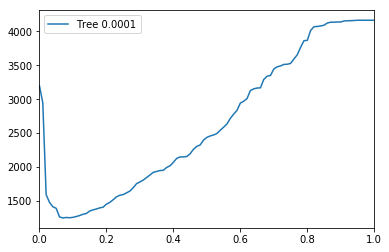




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform') 

Fold 1/10 for 15-NN with lowest cost 1323.00 at t = 0.07
Fold 2/10 for 15-NN with lowest cost 1390.00 at t = 0.07
Fold 3/10 for 15-NN with lowest cost 1296.00 at t = 0.07
Fold 4/10 for 15-NN with lowest cost 1334.00 at t = 0.07
Fold 5/10 for 15-NN with lowest cost 1415.00 at t = 0.07
Fold 6/10 for 15-NN with lowest cost 1436.00 at t = 0.07
Fold 7/10 for 15-NN with lowest cost 1307.00 at t = 0.07
Fold 8/10 for 15-NN with lowest cost 1370.00 at t = 0.07
Fold 9/10 for 15-NN with lowest cost 1344.00 at t = 0.07
Fold 10/10 for 15-NN with lowest cost 1333.00 at t = 0.07
The lowest cost will be reached if t is equal to       0.07
The lowest average cost would be                           1354.8.


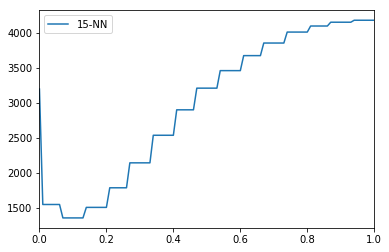




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False) 

Fold 1/10 for Logistic R with lowest cost 1250.00 at t = 0.12
Fold 2/10 for Logistic R with lowest cost 1286.00 at t = 0.11
Fold 3/10 for Logistic R with lowest cost 1317.00 at t = 0.08
Fold 4/10 for Logistic R with lowest cost 1338.00 at t = 0.09
Fold 5/10 for Logistic R with lowest cost 1242.00 at t = 0.10
Fold 6/10 for Logistic R with lowest cost 1356.00 at t = 0.08
Fold 7/10 for Logistic R with lowest cost 1423.00 at t = 0.13
Fold 8/10 for Logistic R with lowest cost 1303.00 at t = 0.11
Fold 9/10 for Logistic R with lowest cost 1284.00 at t = 0.08
Fold 10/10 for Logistic R with lowest cost 1226.00 at t = 0.08
The lowest cost will be reached if t is equal to       0.08
The lowest average cost would be                    

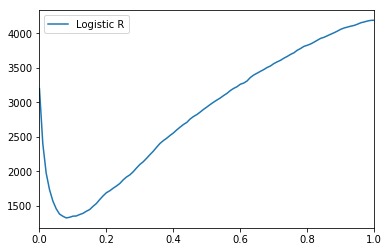




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Fold 1/10 for RandomF 50 trees with lowest cost 1049.00 at t = 0.11
Fold 2/10 for RandomF 50 trees with lowest cost 1138.00 at t = 0.07
Fold 3/10 for RandomF 50 trees with lowest cost 1166.00 at t = 0.13
Fold 4/10 for RandomF 50 trees with lowest cost 1069.00 at t = 0.13
Fold 5/10 for RandomF 50 trees with lowest cost 1098.00 at t = 0.09
Fold 6/10 for RandomF 50 trees with lowest cost 1091.00 at t = 0.09
Fold 7/10 for RandomF 50 trees with lowest cost 1110.00 at t = 0.09
Fold 8/10 for RandomF 50 trees with lowest cost 1146.00 at t = 0.11
Fold 9/10 for RandomF 50 tree

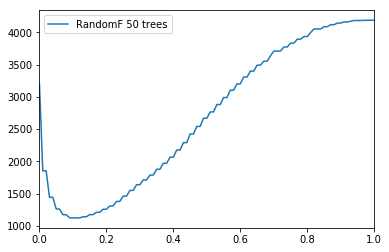

,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,1251.000000,1354.800000,1324.600000,1124.300000
std,62.476662,46.506391,65.103678,52.294147
min,1168.000000,1296.000000,1226.000000,1049.000000
25%,1203.250000,1325.500000,1287.000000,1087.750000
50%,1248.000000,1339.000000,1334.500000,1120.000000
75%,1287.000000,1385.000000,1355.500000,1144.000000
max,1370.000000,1436.000000,1450.000000,1219.000000


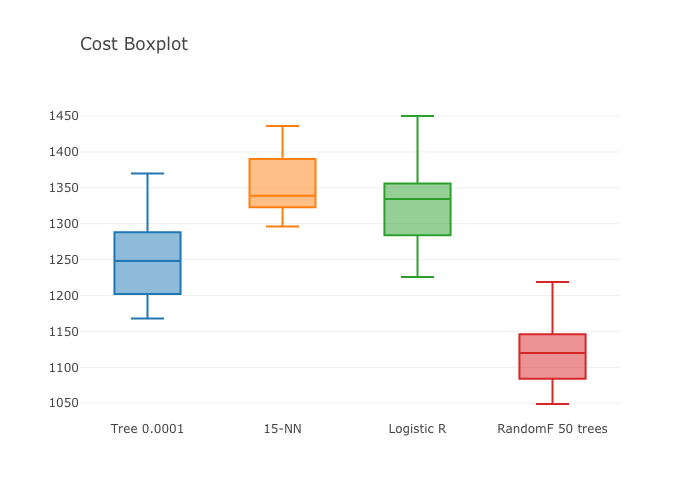

None

In [37]:
df_numerical = df.select_dtypes([int, float]).drop('termDeposit', axis=1)
# apply standartisation
df_st_numerical = pd.DataFrame(StandardScaler().fit_transform(df_numerical.values), index=df_numerical.index, columns=df_numerical.columns)
df.update(df_st_numerical)

permutation = np.random.RandomState(seed=42).permutation(len(df))
df_test = df.iloc[permutation]

X = df_test.drop('termDeposit', axis=1).values
y = df_test['termDeposit'].values

display(boxplot_scores(classification(X, y)))
display(boxplot_scores(cs_classification(X, y)))

Unfortunately, the _Feature Engineering_ steps described before do not produce a consistent desirable result (mean accuracy and mean are within standard deviation range)...

Now it becomes apparent that Random Forest classifier outperforms Decision Trees, k Nearest Neighbours and Logistic Regression for classification and cost-sensitive classification.

In [44]:
df_backup = df.copy(deep=True)

## PCA for numerical attributes

The application of PCA for our numerical data had output the following result




In [3]:
df_features = df.drop('termDeposit', axis=1)
df_target = df['termDeposit']

# select entries without '_' in names, ie only numerical values

numerical = list(filter(lambda col: '_' not in col, df_features.columns)) 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_numerical = df[numerical].astype('float')
df_numerical = pd.DataFrame(StandardScaler().fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_numerical)

import sys

for i in range(pca.n_components):
    print('PC%d' % (i + 1), end=': ')
    for j in range(len(df_numerical.columns)):
        print('%.3f•%s' % (pca.components_[i][j], df_numerical.columns[j]), end=' + ')
    sys.stdout.write("\b\b") # to delete '+' at the end of the last line
    print("\n")
    if i == 2:
        break

'total explained for 3 components variance is %.3f' % sum(pca.explained_variance_ratio_)

PC1: -0.069•age + -0.027•balance + -0.309•day + -0.274•month + 0.069•duration + -0.276•campaign + 0.635•pdays + 0.583•previous + 

PC2: 0.456•age + 0.476•balance + 0.279•day + 0.482•month + -0.147•duration + 0.254•campaign + 0.222•pdays + 0.345•previous + 

PC3: -0.358•age + -0.403•balance + 0.404•day + -0.131•month + -0.422•duration + 0.529•campaign + 0.169•pdays + 0.208•previous + 



'total explained for 3 components variance is 0.486'

In [4]:
for i in range(1, 8):
    pca = PCA(n_components=i)
    principal_components = pca.fit_transform(df_numerical)
    print('%d total explained variance is %.3f' % (i, sum(pca.explained_variance_ratio_)))

1 total explained variance is 0.192
2 total explained variance is 0.341
3 total explained variance is 0.486
4 total explained variance is 0.608
5 total explained variance is 0.719
6 total explained variance is 0.829
7 total explained variance is 0.931


This is strengthtening the conclusion from Pearson correlation matrix that the job `retired` and `student` attribute is predictive of the 'yes' class. Also we noticed that the `pdays` positively correlates with the outcome.

When applying classification we will use first 9 PCA components that explain 80% of the data.

In [5]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_numerical)
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])
principal_df.head()

,PC1,PC2,PC3
0,0.171728,-0.052811,-1.576640
1,0.251075,-0.924223,-0.641081
2,0.302193,-1.358641,-0.142119
3,0.202716,-0.528998,-0.841326
4,0.304314,-1.272850,-0.344163


In [6]:
final_df = pd.concat([principal_df, df[list(filter(lambda col: '_' in col, df_features.columns))], df[['termDeposit']]], axis = 1)
final_df.head()

,PC1,PC2,PC3,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,termDeposit
0,0.171728,-0.052811,-1.576640,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0.251075,-0.924223,-0.641081,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0.302193,-1.358641,-0.142119,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0.202716,-0.528998,-0.841326,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.304314,-1.272850,-0.344163,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


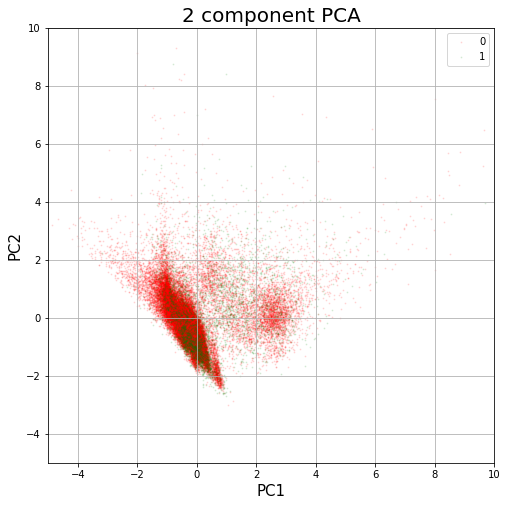

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indices = final_df['termDeposit'] == target
    ax.scatter(final_df.loc[indices, 'PC1'],
               final_df.loc[indices, 'PC2'],
               c = color,
               s = 1,
               alpha=0.1)
ax.legend(targets)
ax.grid()

finished Tree 0.0001
finished 15-NN
finished Logistic R
finished RandomF 50 trees


,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,0.895546,0.891592,0.892892,0.892145
std,0.002576,0.001787,0.002854,0.001390
min,0.891869,0.887752,0.889411,0.889135
25%,0.894457,0.891109,0.890863,0.891907
50%,0.894941,0.891623,0.892576,0.892176
75%,0.897429,0.892314,0.894741,0.892860
max,0.899641,0.894941,0.898535,0.894388


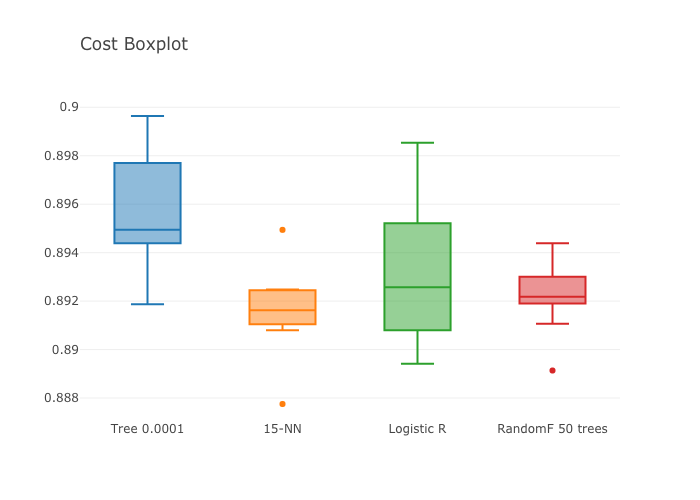

None

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Fold 1/10 for Tree 0.0001 with lowest cost 1813.00 at t = 0.10
Fold 2/10 for Tree 0.0001 with lowest cost 1797.00 at t = 0.06
Fold 3/10 for Tree 0.0001 with lowest cost 1919.00 at t = 0.10
Fold 4/10 for Tree 0.0001 with lowest cost 1927.00 at t = 0.10
Fold 5/10 for Tree 0.0001 with lowest cost 1795.00 at t = 0.11
Fold 6/10 for Tree 0.0001 with lowest cost 2030.00 at t = 0.05
Fold 7/10 for Tree 0.0001 with lowest cost 1788.00 at t = 0.07
Fold 8/10 for Tree 0.0001 with lowest cost 1779.00 at t = 0.09
Fold 9/10 for Tree 0.0001 with lowest cost 1879.00 at t = 0.06
Fold 10/10 for Tree 0.0001 with lowest cost 1864.00 at t = 0.07
The lowest cos

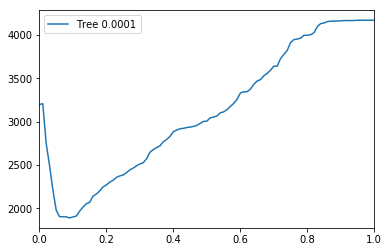




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform') 

Fold 1/10 for 15-NN with lowest cost 1850.00 at t = 0.07
Fold 2/10 for 15-NN with lowest cost 1853.00 at t = 0.07
Fold 3/10 for 15-NN with lowest cost 1931.00 at t = 0.07
Fold 4/10 for 15-NN with lowest cost 1900.00 at t = 0.07
Fold 5/10 for 15-NN with lowest cost 1817.00 at t = 0.07
Fold 6/10 for 15-NN with lowest cost 1938.00 at t = 0.07
Fold 7/10 for 15-NN with lowest cost 1870.00 at t = 0.07
Fold 8/10 for 15-NN with lowest cost 1898.00 at t = 0.07
Fold 9/10 for 15-NN with lowest cost 1833.00 at t = 0.07
Fold 10/10 for 15-NN with lowest cost 1924.00 at t = 0.07
The lowest cost will be reached if t is equal to       0.07
The lowest average cost would be                           1881.4.


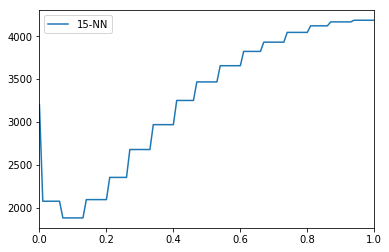




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False) 

Fold 1/10 for Logistic R with lowest cost 1817.00 at t = 0.08
Fold 2/10 for Logistic R with lowest cost 1857.00 at t = 0.09
Fold 3/10 for Logistic R with lowest cost 1830.00 at t = 0.09
Fold 4/10 for Logistic R with lowest cost 1886.00 at t = 0.10
Fold 5/10 for Logistic R with lowest cost 1752.00 at t = 0.10
Fold 6/10 for Logistic R with lowest cost 1963.00 at t = 0.08
Fold 7/10 for Logistic R with lowest cost 1753.00 at t = 0.08
Fold 8/10 for Logistic R with lowest cost 1730.00 at t = 0.09
Fold 9/10 for Logistic R with lowest cost 1922.00 at t = 0.14
Fold 10/10 for Logistic R with lowest cost 1811.00 at t = 0.11
The lowest cost will be reached if t is equal to       0.09
The lowest average cost would be                    

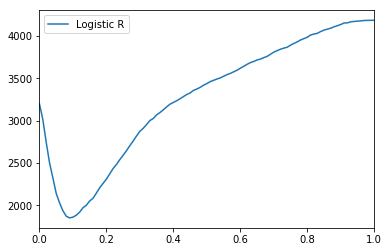




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Fold 1/10 for RandomF 50 trees with lowest cost 1722.00 at t = 0.07
Fold 2/10 for RandomF 50 trees with lowest cost 1721.00 at t = 0.09
Fold 3/10 for RandomF 50 trees with lowest cost 1912.00 at t = 0.07
Fold 4/10 for RandomF 50 trees with lowest cost 1837.00 at t = 0.09
Fold 5/10 for RandomF 50 trees with lowest cost 1733.00 at t = 0.09
Fold 6/10 for RandomF 50 trees with lowest cost 1895.00 at t = 0.07
Fold 7/10 for RandomF 50 trees with lowest cost 1723.00 at t = 0.09
Fold 8/10 for RandomF 50 trees with lowest cost 1761.00 at t = 0.11
Fold 9/10 for RandomF 50 tree

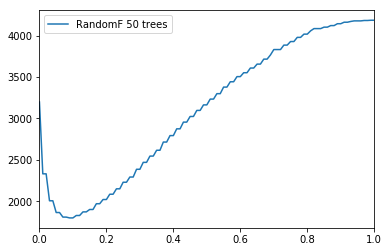

,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.0000,10.000000,10.000000,10.000000
mean,1888.2000,1881.400000,1849.500000,1799.100000
std,78.4514,42.833528,80.126636,77.486128
min,1779.0000,1817.000000,1730.000000,1721.000000
25%,1837.7500,1850.750000,1797.000000,1733.750000
50%,1880.5000,1884.000000,1841.500000,1785.000000
75%,1928.0000,1918.000000,1890.750000,1835.000000
max,2051.0000,1938.000000,1981.000000,1946.000000


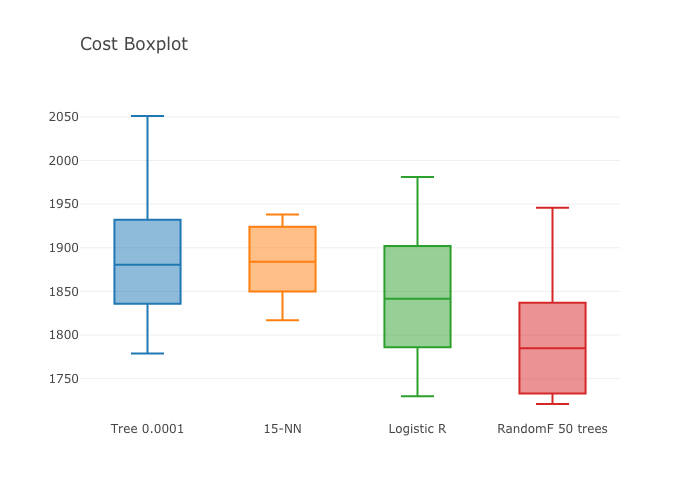

None

In [8]:
df = final_df.copy(deep=True)

permutation = np.random.RandomState(seed=42).permutation(len(df))
df_test = df.iloc[permutation]

X = df_test.drop('termDeposit', axis=1).values
y = df_test['termDeposit'].values

display(boxplot_scores(classification(X, y)))
display(boxplot_scores(cs_classification(X, y)))

Both classification and cost-sensitive classification are performing worse. This effect is reminiscent of the observation when we reduce the image, we loose some details. In this case, the details appear to be critical for correct classification. In addition, the classifiers that we chose are not prone to over-fitting, especially decision tree and random forest.

## Conclusion

The model that brigs the __highest accuracy__ would be either _Decision Tree_ or _Random Forest_. _Logistic Regression_ is well enough, but it can't be more accurate due to it's lack of parameters that could be adjusted. On the other hand, _Random Forest_ classifier has plenty parameters to adjust.

The model for __cost-sensitive__ would be definitely _Random Forest_ classifier. It by far outperforms all the other classifiers. 

Now, the final part is parameter tuning.

# Parameter Tuning

After an exhaustive amount of experiments I found optimal parameters

In [17]:
df.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,termDeposit
0,1.616177,0,0,0,0,1,0,0,0,0,...,-0.475359,0.016659,-0.574882,-0.409877,-0.241954,0,0,0,1,0
1,0.296210,0,0,0,0,0,0,0,0,0,...,-0.475359,-0.413717,-0.574882,-0.409877,-0.241954,0,0,0,1,0
2,-0.740908,0,0,1,0,0,0,0,0,0,...,-0.475359,-0.707156,-0.574882,-0.409877,-0.241954,0,0,0,1,0
3,0.579060,0,1,0,0,0,0,0,0,0,...,-0.475359,-0.644556,-0.574882,-0.409877,-0.241954,0,0,0,1,0
4,-0.552341,0,0,0,0,1,0,0,0,0,...,-0.475359,-0.460668,-0.574882,-0.409877,-0.241954,0,0,0,1,0


## Classification

finished Final cls


,Final cls
count,10.000000
mean,0.905361
std,0.003131
min,0.900746
25%,0.902793
50%,0.905585
75%,0.907935
max,0.909594


finished Tree 0.0001
finished 15-NN
finished Logistic R
finished RandomF 50 trees


,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,0.901573,0.898421,0.900135,0.903011
std,0.003147,0.002536,0.003554,0.002703
min,0.897124,0.893835,0.894082,0.899364
25%,0.898721,0.897007,0.897982,0.900263
50%,0.902129,0.898949,0.900055,0.903801
75%,0.904410,0.900726,0.903103,0.905101
max,0.905196,0.901050,0.905170,0.906829


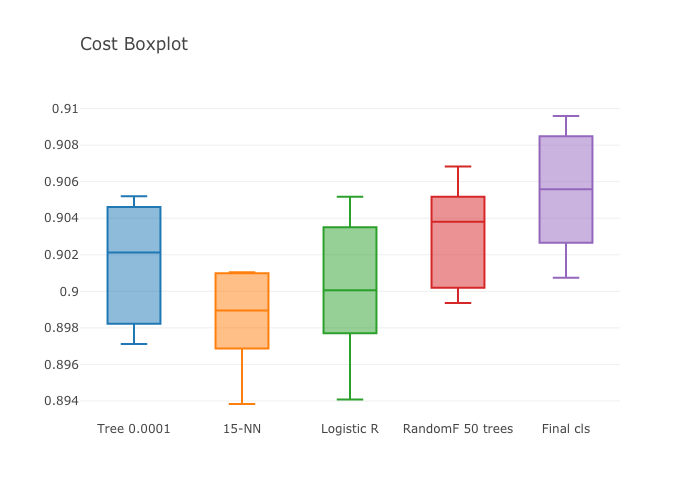

None

In [21]:
scores = pd.DataFrame(index=range(10))

cls = RandomForestClassifier(n_estimators=500,
                                        #max_depth=250,
                                        max_features=12,
                                        min_samples_leaf=3,
                                        verbose=False, 
                                        n_jobs=-1)

name = 'Final cls'
scores[name] = pd.Series(cross_val_score(cls, X, y, cv=10))
print('finished', name)

display(scores.describe())
display(boxplot_scores(pd.concat([classification(X, y), scores], axis=1)))

I managed to improve average accuracy by 0.5% which is higher than the maximum score for any cross validation fold ever before!

It is unfortunate that the chosen parameters although improve accuracy, the execution time is 200 to 300 times bigger. I wouldn't recommend using this model on a server.

## Cost Sensitive Classification

It turns out that the same parameters are optimal for Cost Sensitive Classification, I am not quite sure if it's accidental.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=False,
            warm_start=False) 

Fold 1/10 for Final cls with lowest cost 944.00 at t = 0.11
Fold 2/10 for Final cls with lowest cost 926.00 at t = 0.11
Fold 3/10 for Final cls with lowest cost 931.00 at t = 0.11
Fold 4/10 for Final cls with lowest cost 909.00 at t = 0.13
Fold 5/10 for Final cls with lowest cost 861.00 at t = 0.11
Fold 6/10 for Final cls with lowest cost 949.00 at t = 0.09
Fold 7/10 for Final cls with lowest cost 926.00 at t = 0.09
Fold 8/10 for Final cls with lowest cost 920.00 at t = 0.13
Fold 9/10 for Final cls with lowest cost 865.00 at t = 0.11
Fold 10/10 for Final cls with lowes

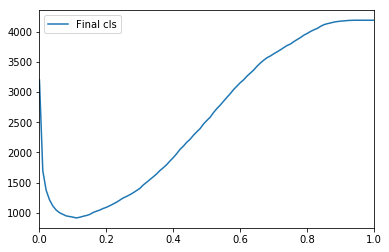

,Final cls
count,10.000000
mean,916.500000
std,41.417254
min,857.000000
25%,877.000000
50%,928.500000
75%,944.000000
max,972.000000


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Fold 1/10 for Tree 0.0001 with lowest cost 1153.00 at t = 0.11
Fold 2/10 for Tree 0.0001 with lowest cost 1204.00 at t = 0.13
Fold 3/10 for Tree 0.0001 with lowest cost 1218.00 at t = 0.06
Fold 4/10 for Tree 0.0001 with lowest cost 1153.00 at t = 0.07
Fold 5/10 for Tree 0.0001 with lowest cost 1136.00 at t = 0.08
Fold 6/10 for Tree 0.0001 with lowest cost 1303.00 at t = 0.06
Fold 7/10 for Tree 0.0001 with lowest cost 1244.00 at t = 0.06
Fold 8/10 for Tree 0.0001 with lowest cost 1220.00 at t = 0.11
Fold 9/10 for Tree 0.0001 with lowest cost 1144.00 at t = 0.09
Fold 10/10 for Tree 0.0001 with lowest cost 1110.00 at t = 0.06
The lowest cos

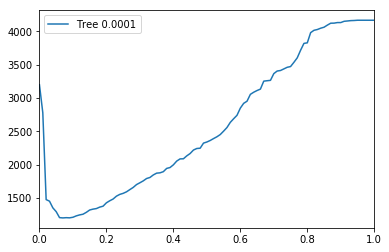




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform') 

Fold 1/10 for 15-NN with lowest cost 1270.00 at t = 0.07
Fold 2/10 for 15-NN with lowest cost 1319.00 at t = 0.14
Fold 3/10 for 15-NN with lowest cost 1378.00 at t = 0.07
Fold 4/10 for 15-NN with lowest cost 1341.00 at t = 0.07
Fold 5/10 for 15-NN with lowest cost 1232.00 at t = 0.07
Fold 6/10 for 15-NN with lowest cost 1510.00 at t = 0.01
Fold 7/10 for 15-NN with lowest cost 1338.00 at t = 0.07
Fold 8/10 for 15-NN with lowest cost 1294.00 at t = 0.07
Fold 9/10 for 15-NN with lowest cost 1277.00 at t = 0.07
Fold 10/10 for 15-NN with lowest cost 1336.00 at t = 0.07
The lowest cost will be reached if t is equal to       0.07
The lowest average cost would be                           1330.1.


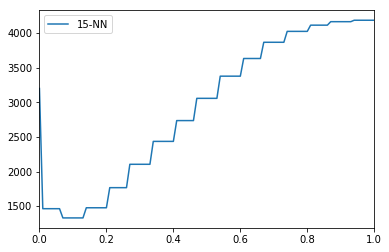




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False) 

Fold 1/10 for Logistic R with lowest cost 1286.00 at t = 0.10
Fold 2/10 for Logistic R with lowest cost 1332.00 at t = 0.11
Fold 3/10 for Logistic R with lowest cost 1357.00 at t = 0.09
Fold 4/10 for Logistic R with lowest cost 1418.00 at t = 0.10
Fold 5/10 for Logistic R with lowest cost 1231.00 at t = 0.11
Fold 6/10 for Logistic R with lowest cost 1439.00 at t = 0.09
Fold 7/10 for Logistic R with lowest cost 1313.00 at t = 0.09
Fold 8/10 for Logistic R with lowest cost 1275.00 at t = 0.09
Fold 9/10 for Logistic R with lowest cost 1294.00 at t = 0.10
Fold 10/10 for Logistic R with lowest cost 1259.00 at t = 0.10
The lowest cost will be reached if t is equal to       0.10
The lowest average cost would be                    

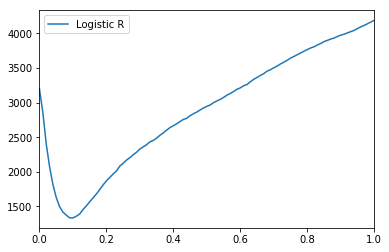




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Fold 1/10 for RandomF 50 trees with lowest cost 997.00 at t = 0.13
Fold 2/10 for RandomF 50 trees with lowest cost 995.00 at t = 0.11
Fold 3/10 for RandomF 50 trees with lowest cost 1090.00 at t = 0.11
Fold 4/10 for RandomF 50 trees with lowest cost 1033.00 at t = 0.09
Fold 5/10 for RandomF 50 trees with lowest cost 962.00 at t = 0.11
Fold 6/10 for RandomF 50 trees with lowest cost 1044.00 at t = 0.11
Fold 7/10 for RandomF 50 trees with lowest cost 1107.00 at t = 0.11
Fold 8/10 for RandomF 50 trees with lowest cost 1054.00 at t = 0.09
Fold 9/10 for RandomF 50 trees w

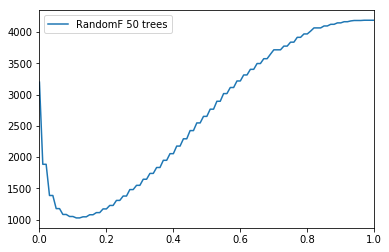

,Tree 0.0001,15-NN,Logistic R,RandomF 50 trees
count,10.000000,10.000000,10.000000,10.000000
mean,1201.200000,1330.100000,1335.000000,1028.300000
std,63.157299,77.573549,71.678294,54.644406
min,1113.000000,1232.000000,1259.000000,950.000000
25%,1147.000000,1281.250000,1288.000000,985.250000
50%,1199.500000,1328.000000,1322.000000,1034.500000
75%,1247.000000,1340.250000,1359.500000,1070.000000
max,1309.000000,1515.000000,1485.000000,1107.000000


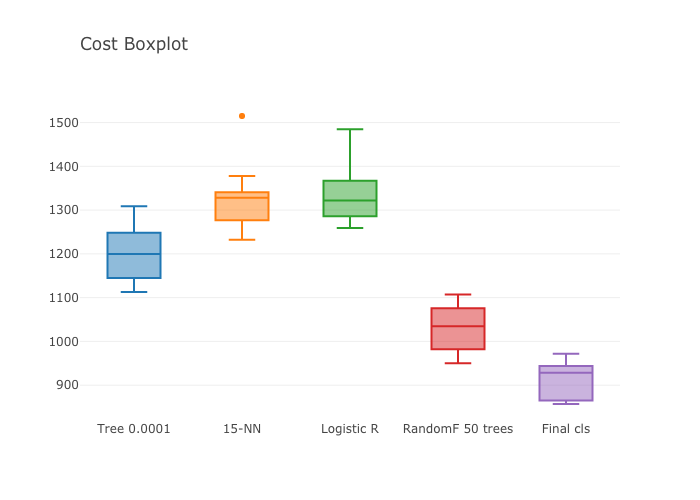

None

In [22]:
cls = RandomForestClassifier(n_estimators=500,
                            # max_depth=250,
                            max_features=12,
                            min_samples_leaf=3,
                            verbose=False, 
                            n_jobs=-1)
name = 'Final cls'
threshold = thresholding(X, y, cls, name=name)
display(threshold['mincost_df'].describe())
display(boxplot_scores(pd.concat([cs_classification(X, y), threshold['mincost_df']], axis=1)))

# Final Classification 

In [42]:
def import_test_df():
    data, meta = arff.loadarff('cworkPredict.arff')
    df = pd.DataFrame(data)

    # all categorical attributes are in binary format

    df = assistmodule.decode_dataframe(df)
    df['month'] = pd.to_datetime(df.month, format='%b').dt.month
    df['termDeposit'] = df['termDeposit'].apply(lambda x: 0 if x == 'no' else 1)
    # this finalises the initial preparation step
    df = assistmodule.one_hot_encode_categorical(df)
    
    df_numerical = df.select_dtypes([int, float]).drop('termDeposit', axis=1)
    # apply standartisation
    df_st_numerical = pd.DataFrame(StandardScaler().fit_transform(df_numerical.values), index=df_numerical.index, columns=df_numerical.columns)
    df.update(df_st_numerical)

    return df

df_test = import_test_df()

X_train = df.drop(['termDeposit'], axis=1).values
y_train = df[['termDeposit']].values

X_test = df_test.drop(['termDeposit'], axis=1).values
y_test = df_test[['termDeposit']].values

cls = RandomForestClassifier(n_estimators=500,
                            # max_depth=250,
                            max_features=12,
                            min_samples_leaf=3,
                            verbose=False, 
                            n_jobs=-1)
cls.fit(X_train, np.squeeze(y_train))
prediction = cls.predict(X_test)

accuracy_cl = metrics.accuracy_score(y_test, prediction)
conf_cl = confusion_matrix(y_test, prediction)
accuracy_cl, "\n", conf_cl

1 job
2 marital
3 education
4 default
6 housing
7 loan
8 contact
15 poutcome


(0.906989604069896, '\n', array([[7723,  218],
        [ 623,  478]]))

In [75]:
cls = RandomForestClassifier(n_estimators=5,
                            # max_depth=250,
                            max_features=12,
                            min_samples_leaf=3,
                            verbose=False, 
                            n_jobs=-1)
cls.fit(X_train, np.squeeze(y_train))
prediction = cls.predict_proba(X_test)[:, 1]
f = open("costsensclasif.txt","w+")
y_pred = prediction >= 0.08
f.write(str(list(y_pred)))
f.close()

The accuracy is 90.65%!

In [69]:
cls = RandomForestClassifier(n_estimators=5,
                            # max_depth=250,
                            max_features=12,
                            min_samples_leaf=3,
                            verbose=False, 
                            n_jobs=-1)
cls.fit(X_train, np.squeeze(y_train))
prediction = cls.predict_proba(X_test)[:, 1]

y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
costs_row = []
for t in np.linspace(0, 1, 101):
    y_pred = prediction >= t # all above or equal t is considered to be 'yes'
    cost = sum((y_pred == 1) & (y_test == 0)) + 10 * sum((y_pred == 0) & (y_test == 1))
    costs_row.append(cost)
    if t*100 % 10 == 0:
        print('%.2f' % t, 'TP {0:<10} TN {1:<10} FP {2:<10} FN {3:<27} cost {4:<10}'.format(
            sum((y_pred == 1) & (y_test == 1)),
            sum((y_pred == 0) & (y_test == 0)),
            sum((y_pred == 1) & (y_test == 0)),
            sum((y_pred == 0) & (y_test == 1)),
            cost) 
        )

t = np.argmin(costs_row)/100
cost = costs_row[np.argmin(costs_row)]
t, cost

0.00 TP 1101       TN 0          FP 7941       FN 0                           cost 7941      
0.10 TP 975        TN 6233       FP 1708       FN 126                         cost 2968      
0.20 TP 887        TN 6907       FP 1034       FN 214                         cost 3174      
0.30 TP 759        TN 7267       FP 674        FN 342                         cost 4094      
0.40 TP 631        TN 7494       FP 447        FN 470                         cost 5147      
0.50 TP 479        TN 7655       FP 286        FN 622                         cost 6506      
0.60 TP 350        TN 7764       FP 177        FN 751                         cost 7687      
0.70 TP 226        TN 7839       FP 102        FN 875                         cost 8852      
0.80 TP 123        TN 7890       FP 51         FN 978                         cost 9831      
0.90 TP 48         TN 7923       FP 18         FN 1053                        cost 10548     
1.00 TP 12         TN 7940       FP 1          FN 1089      

(0.08, 2854)

# Conclusion

In this report I explored the provided dataset and build the classification models. I built two independent models that turned out to be almost identical. The model is Random Forest with the following parameters:

```
n_estimators=500,
max_features=12,
min_samples_leaf=3,
n_jobs=-1,
criterion='gini'
min_samples_split=2
```


Finally, we can now choose the best data mining pipeline, it consists of importing the dataset, process features by applying Standard Scaler and finally applying the tuned version of Random Forest classifier.

The final results:
* Classification: accuracy 90.65%
* Cost Sensitive classification: 2854 (at threshold $t=0.08$)

Advantages
* quick
* easy to implement
* scalable
* deals with imbalances in data
* Quite easy to interpret via /function in random forest that gives attribute importance

Disadvantages
* is hard coded, might be biased for the new data, for instance attribute age may be distributed in some other way where the retiring age is different
* unbalanced data, thus classification will be more accurate for big groups, such as for blue collar workers
* the more complex classifier the longer it takes to train and test it
* unfortunately we don't know the exact dates, I would add a new feature `weekday`. It is useful for prediction because in general more deposits may be are happening on Monday than on Saturday.